In [69]:
# Since we will be generating a lot of charts, let's ensure that all matplotlib charts are rendered within the ipython shell

%matplotlib inline 

# Let's avoid printing of warnings
import warnings
warnings.filterwarnings('ignore')

# importing other libraries

import os
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from pandas_profiling import ProfileReport
from statsmodels.stats.proportion import proportions_ztest

In [108]:
#Let's begin by importing data
titanic_data=pd.read_csv('./Data/train.csv')

In [71]:
#See top rows
titanic_data.head(5)

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [72]:
#Check Data Types of Columns
titanic_data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [73]:
#Check number of rows and columns
titanic_data.shape

(891, 12)

In [74]:
#Data Info
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [75]:
# Column names of Data frame
titanic_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [76]:
# Check duplicates in a data frame
titanic_data.duplicated().sum()

0

In [77]:
# Check the presence of missing values
titanic_data.isnull().sum()+titanic_data.isna().sum()

PassengerId       0
Survived          0
Pclass            0
Name              0
Sex               0
Age             354
SibSp             0
Parch             0
Ticket            0
Fare              0
Cabin          1374
Embarked          4
dtype: int64

In [78]:
#Five number summary
titanic_data.describe().T

count        mean         std   min       25%       50%    75%  \
PassengerId  891.0  446.000000  257.353842  1.00  223.5000  446.0000  668.5   
Survived     891.0    0.383838    0.486592  0.00    0.0000    0.0000    1.0   
Pclass       891.0    2.308642    0.836071  1.00    2.0000    3.0000    3.0   
Age          714.0   29.699118   14.526497  0.42   20.1250   28.0000   38.0   
SibSp        891.0    0.523008    1.102743  0.00    0.0000    0.0000    1.0   
Parch        891.0    0.381594    0.806057  0.00    0.0000    0.0000    0.0   
Fare         891.0   32.204208   49.693429  0.00    7.9104   14.4542   31.0   

                  max  
PassengerId  891.0000  
Survived       1.0000  
Pclass         3.0000  
Age           80.0000  
SibSp          8.0000  
Parch          6.0000  
Fare         512.3292

In [12]:
#Leveraging pandas profiling to investigate data
profile = ProfileReport(titanic_data, title="Data Profiling Report", explorative=True)
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [79]:
cont=['Age','Fare']
cat=['Survived','Parch','SibSp','Sex','Pclass','Embarked']

In [80]:
# We can also look at the distributions of continuous variables and check for skew
def skew_cat(skew_val):
    if skew_val>0.5:
        return 'skewed towards the tail'
    elif skew_val<-.5:
        return 'skewed towards the head'
    else:
        return 'fairly symmetric'

def skew_chart(x,var):
    print("Distribution of " + str(var))
    sns.distplot(x)
    plt.show()
    print("The skew of "+str(var)+" is "+str(x.skew()) + " which indicates that it is " + skew_cat(x.skew()))

Distribution of Age


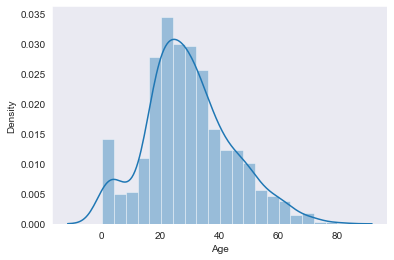

The skew of Age is 0.38910778230082704 which indicates that it is fairly symmetric
Distribution of Fare


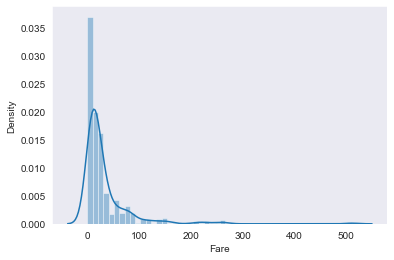

The skew of Fare is 4.787316519674893 which indicates that it is skewed towards the tail


In [81]:
for i in cont:
    skew_chart(titanic_data[i],i)

In [82]:
def outlier(dat,x,val):
      print("Box Plot for " + str(val))
      sns.set_style("dark")
      sns.boxplot(x)
      plt.show()
      print("As per the 'Median +/- 1.5 times IQR")
      med=x.median()
      upq=np.nanpercentile(x,75)
      lwq=np.nanpercentile(x,25)
      iqr=upq-lwq
      print (med,upq,lwq,iqr)

      print("For "+str(val)+" there are " + str(len(dat[x<(med-1.5*(iqr))])) + " outliers on the lower side")
      print("For "+str(val)+" there are " + str(len(dat[x>(med+1.5*(iqr))])) + " outliers on the upper side")
      print('----------')

Box Plot for Age


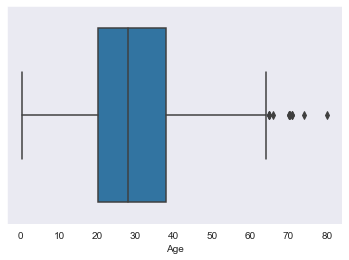

As per the 'Median +/- 1.5 times IQR
28.0 38.0 20.125 17.875
For Age there are 14 outliers on the lower side
For Age there are 42 outliers on the upper side
----------
Box Plot for Fare


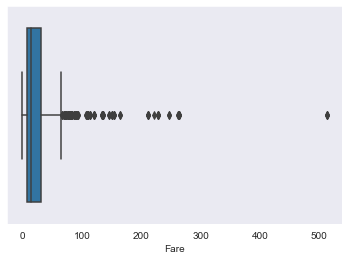

As per the 'Median +/- 1.5 times IQR
14.4542 31.0 7.9104 23.0896
For Fare there are 0 outliers on the lower side
For Fare there are 164 outliers on the upper side
----------


In [83]:
for i in cont:
    outlier(titanic_data,titanic_data[i],i)

In [109]:
titanic_data.Age.fillna(titanic_data.Age.median(), inplace=True)
titanic_data.Age=np.where(titanic_data.Age==0,titanic_data.Age.median(),titanic_data.Age)

Distribution of Age


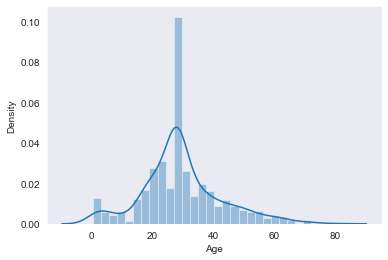

The skew of Age is 0.5102446555756495 which indicates that it is skewed towards the tail


In [91]:
skew_chart( titanic_data["Age"],'Age')

Count Plot for Survived


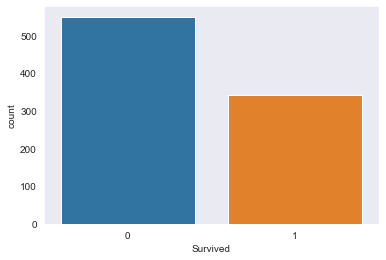

Count Plot for Parch


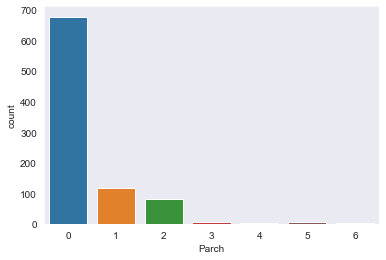

Count Plot for SibSp


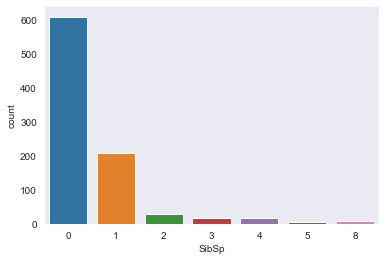

Count Plot for Sex


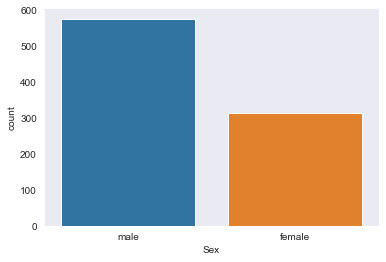

Count Plot for Pclass


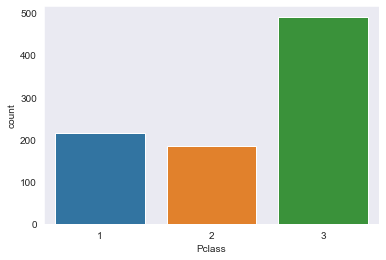

Count Plot for Embarked


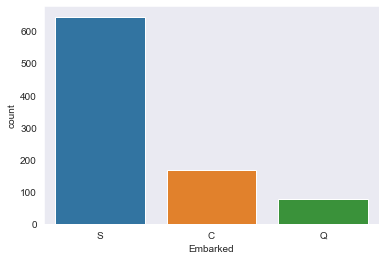

In [32]:
for i in cat:
    print("Count Plot for "+ i)
    sns.countplot(titanic_data[i])
    plt.show()

In [33]:
[titanic_data[item].value_counts(normalize=True,sort=True)*100 for item in cat]

[0    61.616162
 1    38.383838
 Name: Survived, dtype: float64,
 0    76.094276
 1    13.243547
 2     8.978676
 5     0.561167
 3     0.561167
 4     0.448934
 6     0.112233
 Name: Parch, dtype: float64,
 0    68.237935
 1    23.456790
 2     3.142536
 4     2.020202
 3     1.795735
 8     0.785634
 5     0.561167
 Name: SibSp, dtype: float64,
 male      64.758698
 female    35.241302
 Name: Sex, dtype: float64,
 3    55.106622
 1    24.242424
 2    20.650954
 Name: Pclass, dtype: float64,
 S    72.440945
 C    18.897638
 Q     8.661417
 Name: Embarked, dtype: float64]

In [110]:
titanic_data.Embarked.fillna('S',inplace=True)

Relationship of Age with the response to Survival




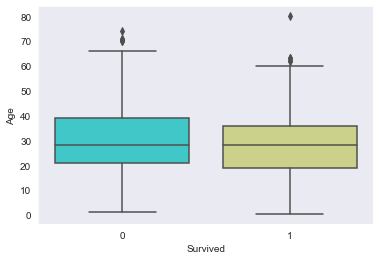

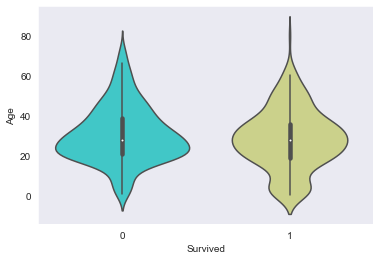

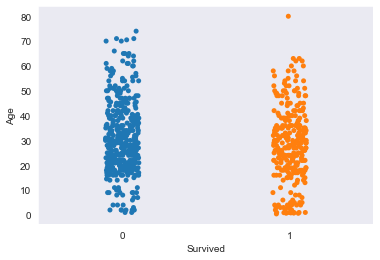

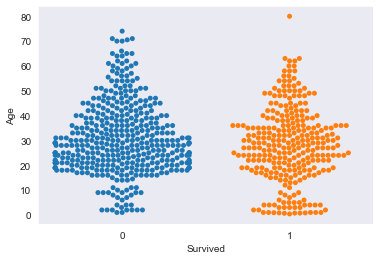



Relationship of Fare with the response to Survival




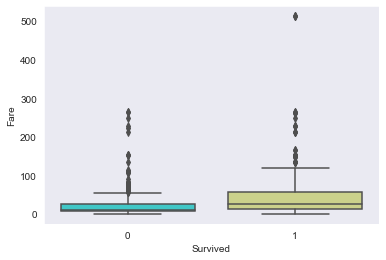

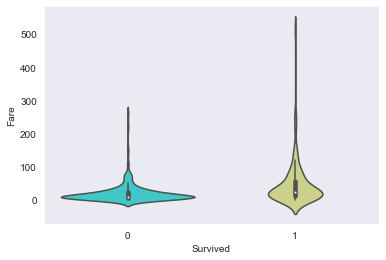

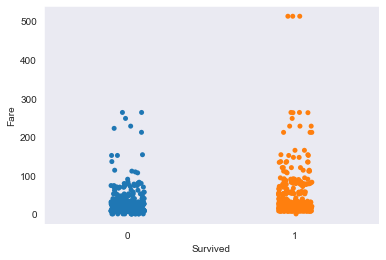

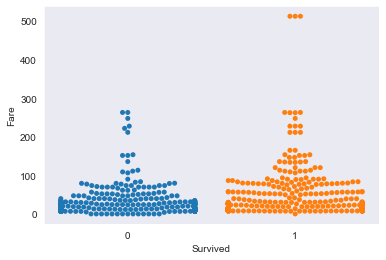

In [36]:
for i in cont:
    print("Relationship of " + i + " with the response to Survival")
    print("\n")
    sns.boxplot(x='Survived',y=i,data=titanic_data,palette='rainbow')
    plt.show()
    sns.violinplot(x="Survived", y=i, data=titanic_data,palette='rainbow')
    plt.show()
    sns.stripplot(x="Survived", y=i, data=titanic_data)
    plt.show()
    sns.swarmplot(x="Survived", y=i, data=titanic_data)
    plt.show()
    print("\n")

In [95]:
#define a function for categorical plot and a cross tabulation
def catplot(x,y,dataset):
    print("Exploring relationship between "+ y+ " and "+ x)
    sns.catplot(y=y, hue=x, kind="count", palette="pastel", edgecolor=".6",data=dataset);
    plt.show()
    print("Cross tab")
    crosstab=pd.crosstab(dataset[x],dataset[y])
    print(crosstab)
    print("Cross Tab in percent(%)")
    print(crosstab.apply(lambda r:r/r.sum()*100,axis=1))
    grp=0
    print('Tests of proportions')
    for i in pd.unique(dataset[y]):
        success=np.array([dataset[dataset[x]==1].shape[0],crosstab[i][1]])
        samples=np.array([dataset.shape[0],crosstab[i].sum()])
        zstat,pvalue=proportions_ztest(count=success,nobs=samples,alternative='two-sided')
        print("For "+str(y)+"="+str(i)+" the p-value of the proportion test with overall population is " + str(pvalue))

        if pvalue<=.05:
            grp+=1
    if grp==0:
        print("There is no significant relationship between "+ y +" and " + x)
    else:
        print("There exists a significant relationship between "+ y +" and " + x)
    
    print("\n")

Exploring relationship between Parch and Survived


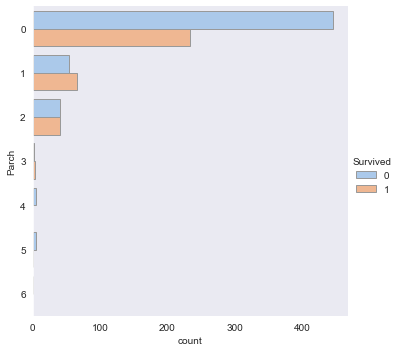

Cross tab
Parch       0   1   2  3  4  5  6
Survived                         
0         445  53  40  2  4  4  1
1         233  65  40  3  0  1  0
Cross Tab in percent(%)
Parch             0          1          2         3         4         5  \
Survived                                                                  
0         81.056466   9.653916   7.285974  0.364299  0.728597  0.728597   
1         68.128655  19.005848  11.695906  0.877193  0.000000  0.292398   

Parch            6  
Survived            
0         0.182149  
1         0.000000  
Tests of proportions
For Parch=0 the p-value of the proportion test with overall population is 0.10178376476167159
For Parch=1 the p-value of the proportion test with overall population is 0.0005106210639552035
For Parch=2 the p-value of the proportion test with overall population is 0.041614448007593965
For Parch=5 the p-value of the proportion test with overall population is 0.3990364427185721
For Parch=3 the p-value of the proportion test

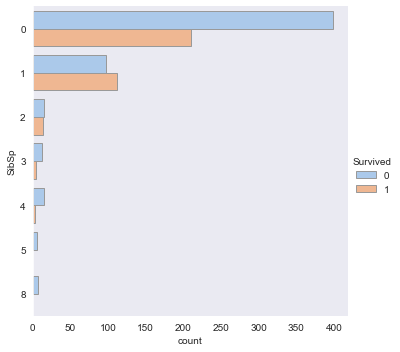

Cross tab
SibSp       0    1   2   3   4  5  8
Survived                            
0         398   97  15  12  15  5  7
1         210  112  13   4   3  0  0
Cross Tab in percent(%)
SibSp             0          1        2         3         4         5  \
Survived                                                                
0         72.495446  17.668488  2.73224  2.185792  2.732240  0.910747   
1         61.403509  32.748538  3.80117  1.169591  0.877193  0.000000   

SibSp            8  
Survived            
0         1.275046  
1         0.000000  
Tests of proportions
For SibSp=1 the p-value of the proportion test with overall population is 5.862176116066526e-05
For SibSp=0 the p-value of the proportion test with overall population is 0.12972039509084338
For SibSp=3 the p-value of the proportion test with overall population is 0.2746772162017217
For SibSp=4 the p-value of the proportion test with overall population is 0.06013559617281224
For SibSp=2 the p-value of the proportion t

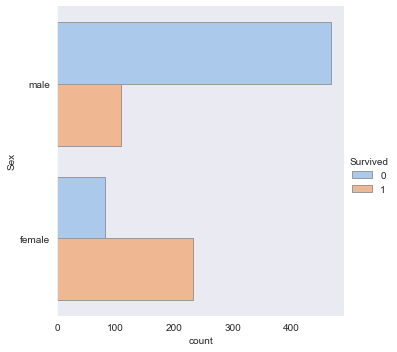

Cross tab
Sex       female  male
Survived              
0             81   468
1            233   109
Cross Tab in percent(%)
Sex          female       male
Survived                      
0         14.754098  85.245902
1         68.128655  31.871345
Tests of proportions
For Sex=male the p-value of the proportion test with overall population is 2.633376484525337e-15
For Sex=female the p-value of the proportion test with overall population is 8.52198529234617e-28
There exists a significant relationship between Sex and Survived


Exploring relationship between Pclass and Survived


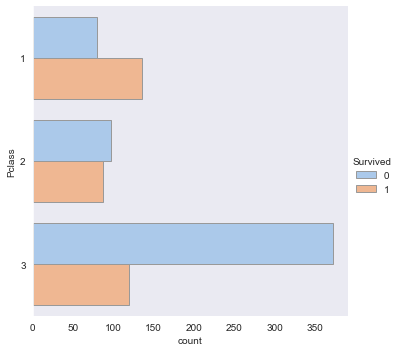

Cross tab
Pclass      1   2    3
Survived              
0          80  97  372
1         136  87  119
Cross Tab in percent(%)
Pclass            1          2          3
Survived                                 
0         14.571949  17.668488  67.759563
1         39.766082  25.438596  34.795322
Tests of proportions
For Pclass=3 the p-value of the proportion test with overall population is 9.361436859048977e-08
For Pclass=1 the p-value of the proportion test with overall population is 6.035910260973782e-11
For Pclass=2 the p-value of the proportion test with overall population is 0.024827669164228617
There exists a significant relationship between Pclass and Survived


Exploring relationship between Embarked and Survived


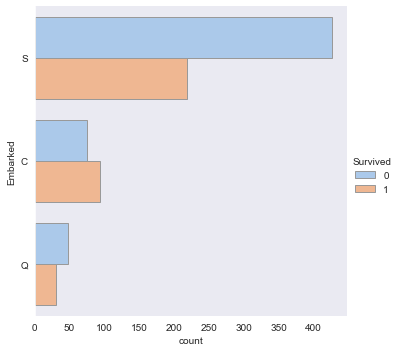

Cross tab
Embarked   C   Q    S
Survived             
0         75  47  427
1         93  30  219
Cross Tab in percent(%)
Embarked          C        Q          S
Survived                               
0         13.661202  8.56102  77.777778
1         27.192982  8.77193  64.035088
Tests of proportions
For Embarked=S the p-value of the proportion test with overall population is 0.07155134694813
For Embarked=C the p-value of the proportion test with overall population is 4.100076227868732e-05
For Embarked=Q the p-value of the proportion test with overall population is 0.9204258051716558
There exists a significant relationship between Embarked and Survived




[None, None, None, None, None]

In [96]:
[catplot("Survived",item,titanic_data) for item in cat if 'Survived' not in item]

In [111]:
titanic_data=pd.concat([titanic_data,pd.get_dummies(titanic_data['Parch']).rename(columns={0:'parch_0',1:'parch_1',2:'parch_2',3:'parch_3',4:'parch_4',5:'parch_5',6:'parch_6'})],axis=1)

In [112]:
titanic_data=pd.concat([titanic_data,pd.get_dummies(titanic_data['Embarked']).rename(columns={'C':'emb_c','S':'em_s','Q':'em_q'})],axis=1)

In [113]:
titanic_data=pd.concat([titanic_data,pd.get_dummies(titanic_data['Sex'])],axis=1)

In [114]:
titanic_data=pd.concat([titanic_data,pd.get_dummies(titanic_data['Pclass']).rename(columns={1:'class1',2:'class2',3:'class3'})],axis=1)

In [115]:
titanic_data=pd.concat([titanic_data,pd.get_dummies(titanic_data['SibSp']).rename(columns={0:'sib_0',1:'sib_1',2:'sib_2',3:'sib_3',4:'sib_4',5:'sib_5',8:'sib_8'})],axis=1)

In [116]:
titanic_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'parch_0', 'parch_1',
       'parch_2', 'parch_3', 'parch_4', 'parch_5', 'parch_6', 'emb_c', 'em_q',
       'em_s', 'female', 'male', 'class1', 'class2', 'class3', 'sib_0',
       'sib_1', 'sib_2', 'sib_3', 'sib_4', 'sib_5', 'sib_8'],
      dtype='object')

In [117]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn import metrics
from sklearn.preprocessing import StandardScaler, LabelEncoder
#import xgboost as xgb
#from xgboost import XGBClassifier, plot_tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import RepeatedStratifiedKFold, KFold, cross_val_score, LeaveOneOut, StratifiedKFold
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score,precision_score, recall_score, f1_score
from sklearn.metrics import precision_recall_fscore_support, roc_curve, roc_auc_score

In [119]:
X=titanic_data[[item for item in titanic_data.columns.to_list() if item not in ['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'SibSp', 'Parch', 'Ticket', 'Cabin', 'Embarked']]]
y=titanic_data['Survived']

In [120]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state=145)

In [121]:
scaler = StandardScaler()

X_std = scaler.fit_transform(X)
X_rescaled=pd.DataFrame(X_std)

X_train_std = scaler.fit_transform(X_train)
X_train_scaled=pd.DataFrame(X_train_std)

X_test_std = scaler.transform(X_test)
X_test_scaled=pd.DataFrame(X_test_std)

In [122]:
class_models = []
class_models.append(('LogisticRegression', LogisticRegression()))
class_models.append(('KNearestNeighbours', KNeighborsClassifier(n_neighbors= 3)))
class_models.append(('GaussianNB', GaussianNB()))
class_models.append(('DecisionTrees', DecisionTreeClassifier()))
class_models.append(('RandomForest', RandomForestClassifier()))
class_models.append(('AdaBoost', AdaBoostClassifier()))
class_models.append(('Bagging Classifier', BaggingClassifier()))
class_models.append(('GradientBoosting', GradientBoostingClassifier()))
#class_models.append(('XGB', XGBClassifier(verbosity=0)))
class_models.append(('SVC', SVC(kernel = 'rbf',probability=True)))

In [123]:
col = ['Algorithm', 'Model', 'Accuracy_Train', 'Accuracy_Test', 'Precision_Test', 'True_Positive Rate (Recall)','F1_Score_Test',
       'ROC_AUC_SCORE(Avg)']
model_results = pd.DataFrame(columns=col)
i=0

In [124]:
def roc_auc_score_multiclass(actual_class, pred_class, average = "macro"):
    #creating a set of all the unique classes using the actual class list
    unique_class = set(actual_class)
    roc_auc_dict = {}
    roc_auc_tot = 0
    k=0
    for per_class in unique_class:
        k+=1
        #creating a list of all the classes except the current class 
        other_class = [x for x in unique_class if x != per_class]
        
        #marking the current class as 1 and all other classes as 0
        new_actual_class = [0 if x in other_class else 1 for x in actual_class]
        new_pred_class = [0 if x in other_class else 1 for x in pred_class]
        
        #using the sklearn metrics method to calculate the roc_auc_score
        roc_auc = roc_auc_score(new_actual_class, new_pred_class, average = average)
        roc_auc_dict[per_class] = roc_auc
        roc_auc_tot = roc_auc_tot + roc_auc
    #Averaging for all the classes together
    roc_auc_avg = roc_auc_tot/k
    print('ROC-AUC Score (Avg) for Test set :', roc_auc_avg)
    print('\n')
    print('Count of Classes:', k)
    
    return roc_auc_dict, roc_auc_avg

In [125]:
def print_scores(name, model, y_train, y_pred_train, y_test, y_pred_test ):
    print("\n" + "\033[1m" + "\nModel: ",name)
    print("\033[0m")
    acc_score_train = accuracy_score(y_train, y_pred_train)
    acc_score_test = accuracy_score(y_test, y_pred_test)
    print("Training Set accuracy: ",acc_score_train)
    print("Test Set accuracy: ",acc_score_test)
    pre_score_train = precision_score(y_train, y_pred_train,average='weighted')
    pre_score_test = precision_score(y_test, y_pred_test, average='weighted')
    print("Test Set precision: ",pre_score_test)
    rec_score_train = recall_score(y_train, y_pred_train, average='weighted')
    rec_score_test = recall_score(y_test, y_pred_test, average='weighted')
    print("Test Set recall: ",rec_score_test)
    f_score_train = f1_score(y_train, y_pred_train, average='weighted')
    f_score_test = f1_score(y_test, y_pred_test, average='weighted')
    print("Test Set f1_score: ",f_score_test)
    
    lr_roc_auc_multiclass, roc_auc_avg = roc_auc_score_multiclass(y_test, y_pred_test)
    print("Test Set ROC_AUC_Score(Avg): ",roc_auc_avg)
    print('\n')
    print(lr_roc_auc_multiclass)
    
    model_results.loc[i] = [name, model,
                            round(acc_score_train*100, 2),
                            round(acc_score_test*100, 2),
                            round(pre_score_test*100, 2),
                            round(rec_score_test*100, 2),
                            round(f_score_test*100, 2),
                            round(roc_auc_avg*100, 2)]
    return

Classification Report using base LogisticRegression for Training dataset
              precision    recall  f1-score   support

           0       0.82      0.87      0.84       384
           1       0.77      0.69      0.73       239

    accuracy                           0.80       623
   macro avg       0.79      0.78      0.79       623
weighted avg       0.80      0.80      0.80       623

Classification Report using base LogisticRegression for Test dataset
              precision    recall  f1-score   support

           0       0.88      0.83      0.85       165
           1       0.75      0.82      0.78       103

    accuracy                           0.82       268
   macro avg       0.81      0.82      0.82       268
weighted avg       0.83      0.82      0.83       268



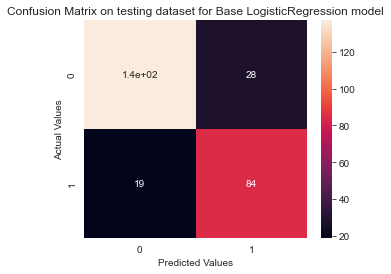



Model:  LogisticRegression(Base Model)

Training Set accuracy:  0.8025682182985554
Test Set accuracy:  0.8246268656716418
Test Set precision:  0.8289322617680827
Test Set recall:  0.8246268656716418
Test Set f1_score:  0.8258389642744763
ROC-AUC Score (Avg) for Test set : 0.8229185054427773


Count of Classes: 2
Test Set ROC_AUC_Score(Avg):  0.8229185054427773


{0: 0.8229185054427773, 1: 0.8229185054427773}
Classification Report using base KNearestNeighbours for Training dataset
              precision    recall  f1-score   support

           0       0.89      0.91      0.90       384
           1       0.85      0.81      0.83       239

    accuracy                           0.87       623
   macro avg       0.87      0.86      0.86       623
weighted avg       0.87      0.87      0.87       623

Classification Report using base KNearestNeighbours for Test dataset
              precision    recall  f1-score   support

           0       0.85      0.74      0.79       165
        

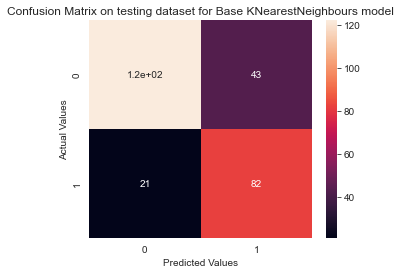



Model:  KNearestNeighbours(Base Model)

Training Set accuracy:  0.8731942215088283
Test Set accuracy:  0.7611940298507462
Test Set precision:  0.777377726750861
Test Set recall:  0.7611940298507462
Test Set f1_score:  0.7641865858676541
ROC-AUC Score (Avg) for Test set : 0.7677552221241541


Count of Classes: 2
Test Set ROC_AUC_Score(Avg):  0.7677552221241541


{0: 0.767755222124154, 1: 0.7677552221241541}
Classification Report using base GaussianNB for Training dataset
              precision    recall  f1-score   support

           0       0.92      0.06      0.12       384
           1       0.40      0.99      0.57       239

    accuracy                           0.42       623
   macro avg       0.66      0.53      0.34       623
weighted avg       0.72      0.42      0.29       623

Classification Report using base GaussianNB for Test dataset
              precision    recall  f1-score   support

           0       0.86      0.07      0.13       165
           1       0.40   

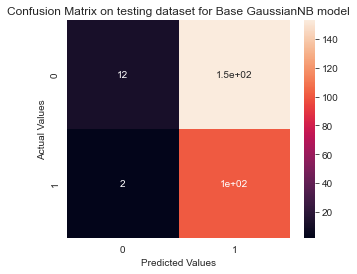



Model:  GaussianNB(Base Model)

Training Set accuracy:  0.4189406099518459
Test Set accuracy:  0.4216417910447761
Test Set precision:  0.6805420311267062
Test Set recall:  0.4216417910447761
Test Set f1_score:  0.30001125773414516
ROC-AUC Score (Avg) for Test set : 0.5266548984995587


Count of Classes: 2
Test Set ROC_AUC_Score(Avg):  0.5266548984995587


{0: 0.5266548984995587, 1: 0.5266548984995587}
Classification Report using base DecisionTrees for Training dataset
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       384
           1       0.99      0.97      0.98       239

    accuracy                           0.98       623
   macro avg       0.99      0.98      0.98       623
weighted avg       0.98      0.98      0.98       623

Classification Report using base DecisionTrees for Test dataset
              precision    recall  f1-score   support

           0       0.84      0.79      0.82       165
           1       0.70  

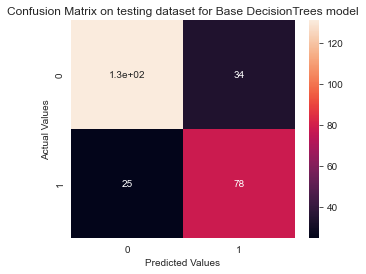



Model:  DecisionTrees(Base Model)

Training Set accuracy:  0.9839486356340289
Test Set accuracy:  0.7798507462686567
Test Set precision:  0.7846635640478924
Test Set recall:  0.7798507462686567
Test Set f1_score:  0.7813723168551938
ROC-AUC Score (Avg) for Test set : 0.7756104736687262


Count of Classes: 2
Test Set ROC_AUC_Score(Avg):  0.7756104736687262


{0: 0.7756104736687262, 1: 0.7756104736687262}
Classification Report using base RandomForest for Training dataset
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       384
           1       0.99      0.97      0.98       239

    accuracy                           0.98       623
   macro avg       0.98      0.98      0.98       623
weighted avg       0.98      0.98      0.98       623

Classification Report using base RandomForest for Test dataset
              precision    recall  f1-score   support

           0       0.87      0.82      0.85       165
           1       0.74  

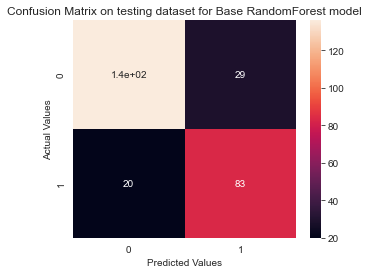



Model:  RandomForest(Base Model)

Training Set accuracy:  0.9839486356340289
Test Set accuracy:  0.8171641791044776
Test Set precision:  0.8215541454813843
Test Set recall:  0.8171641791044776
Test Set f1_score:  0.8184278563712626
ROC-AUC Score (Avg) for Test set : 0.8150338334804355


Count of Classes: 2
Test Set ROC_AUC_Score(Avg):  0.8150338334804355


{0: 0.8150338334804355, 1: 0.8150338334804355}
Classification Report using base AdaBoost for Training dataset
              precision    recall  f1-score   support

           0       0.84      0.86      0.85       384
           1       0.77      0.74      0.75       239

    accuracy                           0.81       623
   macro avg       0.80      0.80      0.80       623
weighted avg       0.81      0.81      0.81       623

Classification Report using base AdaBoost for Test dataset
              precision    recall  f1-score   support

           0       0.87      0.84      0.86       165
           1       0.76      0.81 

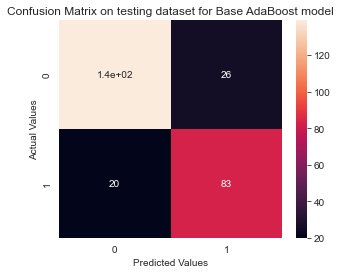



Model:  AdaBoost(Base Model)

Training Set accuracy:  0.812199036918138
Test Set accuracy:  0.8283582089552238
Test Set precision:  0.8308823719381283
Test Set recall:  0.8283582089552238
Test Set f1_score:  0.8291978263817182
ROC-AUC Score (Avg) for Test set : 0.8241247425713445


Count of Classes: 2
Test Set ROC_AUC_Score(Avg):  0.8241247425713445


{0: 0.8241247425713445, 1: 0.8241247425713446}
Classification Report using base Bagging Classifier for Training dataset
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       384
           1       0.97      0.94      0.96       239

    accuracy                           0.97       623
   macro avg       0.97      0.96      0.96       623
weighted avg       0.97      0.97      0.97       623

Classification Report using base Bagging Classifier for Test dataset
              precision    recall  f1-score   support

           0       0.87      0.83      0.85       165
           1       

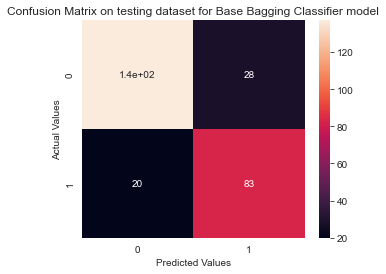



Model:  Bagging Classifier(Base Model)

Training Set accuracy:  0.9662921348314607
Test Set accuracy:  0.8208955223880597
Test Set precision:  0.8246227975289674
Test Set recall:  0.8208955223880597
Test Set f1_score:  0.8220183692901372
ROC-AUC Score (Avg) for Test set : 0.8180641365107385


Count of Classes: 2
Test Set ROC_AUC_Score(Avg):  0.8180641365107385


{0: 0.8180641365107385, 1: 0.8180641365107385}
Classification Report using base GradientBoosting for Training dataset
              precision    recall  f1-score   support

           0       0.89      0.96      0.92       384
           1       0.92      0.81      0.86       239

    accuracy                           0.90       623
   macro avg       0.91      0.88      0.89       623
weighted avg       0.90      0.90      0.90       623

Classification Report using base GradientBoosting for Test dataset
              precision    recall  f1-score   support

           0       0.86      0.90      0.88       165
           1

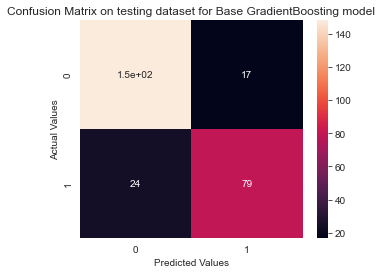



Model:  GradientBoosting(Base Model)

Training Set accuracy:  0.9004815409309791
Test Set accuracy:  0.8470149253731343
Test Set precision:  0.8460341822862432
Test Set recall:  0.8470149253731343
Test Set f1_score:  0.8459130988660474
ROC-AUC Score (Avg) for Test set : 0.8319799941159165


Count of Classes: 2
Test Set ROC_AUC_Score(Avg):  0.8319799941159165


{0: 0.8319799941159164, 1: 0.8319799941159165}
Classification Report using base SVC for Training dataset
              precision    recall  f1-score   support

           0       0.82      0.91      0.86       384
           1       0.83      0.68      0.75       239

    accuracy                           0.82       623
   macro avg       0.83      0.80      0.81       623
weighted avg       0.82      0.82      0.82       623

Classification Report using base SVC for Test dataset
              precision    recall  f1-score   support

           0       0.86      0.91      0.88       165
           1       0.84      0.77      0

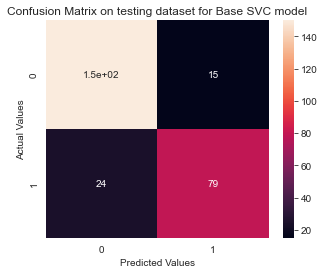



Model:  SVC(Base Model)

Training Set accuracy:  0.8234349919743178
Test Set accuracy:  0.8544776119402985
Test Set precision:  0.8537507802148466
Test Set recall:  0.8544776119402985
Test Set f1_score:  0.8530852095928425
ROC-AUC Score (Avg) for Test set : 0.8380406001765225


Count of Classes: 2
Test Set ROC_AUC_Score(Avg):  0.8380406001765225


{0: 0.8380406001765225, 1: 0.8380406001765225}


In [126]:
for modelname, model in class_models:
    mdl=model.fit(X_train_scaled,y_train)
    pred_train=mdl.predict(X_train_scaled)
    pred_test=mdl.predict(X_test_scaled)
    print(f"Classification Report using base {modelname} for Training dataset")
    print(classification_report(y_train, pred_train))
    print(f"Classification Report using base {modelname} for Test dataset")
    print(classification_report(y_test, pred_test))
    
    cm = metrics.confusion_matrix(y_test, pred_test)
    cm_df = pd.DataFrame(cm)
    #Plotting the confusion matrix
    plt.figure(figsize=(5,4))
    sns.heatmap(cm_df, annot=True)
    plt.title(f'Confusion Matrix on testing dataset for Base {modelname} model')
    plt.ylabel('Actual Values')
    plt.xlabel('Predicted Values')
    plt.show()
    i += 1
    print_scores(modelname + '(Base Model)', model, y_train, pred_train, y_test, pred_test)

In [127]:
model_results

Algorithm  \
1  LogisticRegression(Base Model)   
2  KNearestNeighbours(Base Model)   
3          GaussianNB(Base Model)   
4       DecisionTrees(Base Model)   
5        RandomForest(Base Model)   
6            AdaBoost(Base Model)   
7  Bagging Classifier(Base Model)   
8    GradientBoosting(Base Model)   
9                 SVC(Base Model)   

                                               Model  Accuracy_Train  \
1                               LogisticRegression()           80.26   
2                KNeighborsClassifier(n_neighbors=3)           87.32   
3                                       GaussianNB()           41.89   
4                           DecisionTreeClassifier()           98.39   
5  (DecisionTreeClassifier(max_features='auto', r...           98.39   
6  (DecisionTreeClassifier(max_depth=1, random_st...           81.22   
7  (DecisionTreeClassifier(random_state=149976301...           96.63   
8  ([DecisionTreeRegressor(criterion='friedman_ms...           90.05   
9                              SVC(probability=True)           82.34   

   Accuracy_Test  Precision_Test  True_Positive Rate (Recall)  F1_Score_Test  \
1          82.46           82.89                        82.46          82.58   
2          76.12           77.74                        76.12          76.42   
3          42.16           68.05                        42.16          30.00   
4          77.99           78.47                        77.99          78.14   
5          81.72           82.16                        81.72          81.84   
6          82.84           83.09                        82.84          82.92   
7          82.09           82.46                        82.09          82.20   
8          84.70           84.60                        84.70          84.59   
9          85.45           85.38                        85.45          85.31   

   ROC_AUC_SCORE(Avg)  
1               82.29  
2               76.78  
3               52.67  
4               77.56  
5               81.50  
6               82.41  
7               81.81  
8               83.20  
9               83.80

In [128]:
# Set grid/randomized search params
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
param_range = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
param_grids = []
param_grids.append(({'C': [0.001,0.01,0.1,1,10,100],
                     'penalty':['l1','l2']}))
param_grids.append(({'n_neighbors' : range(3, 16, 2), 
                    'weights' : ['distance'], 
                    'metric' : ['euclidean', 'manhattan', 'minkowski']}))
param_grids.append(({'var_smoothing': np.logspace(0,-9, num=100)}))
param_grids.append(({'max_depth':np.arange(10,50,10)}))
param_grids.append(({'max_depth': param_range, 
                   'min_samples_split': param_range[1:], 
                   'min_samples_leaf': param_range, 
                   'criterion':['gini','entropy']}))
param_grids.append(({'n_estimators':np.arange(50,100,10),
                   'learning_rate':[0.1,0.5]}))
param_grids.append(({'n_estimators':[10, 100, 1000]}))
param_grids.append(({'n_estimators':[5,50,100,1000],
                    'max_depth':[1,3,5,7,9], 
                    'learning_rate':[0.01,0.1,1]}))
'''
param_grids.append(({'learning_rate': [0.05, 0.10, 0.15], 
                    'max_depth': [ 3, 4, 5, 6, 8],
                    'min_child_weight' : [ 1, 3, 5],
                    'gamma' : [ 0.0, 0.1, 0.2 , 0.3], 
                    'colsample_bytree' : [ 0.3, 0.5 ]}))
'''
param_grids.append(({'kernel': ['poly', 'rbf', 'sigmoid'], 
                    'C': [10, 1.0, 0.1, 0.01],
                    'gamma': ['scale']}))

Best: 0.794581 using {'penalty': 'l2', 'C': 0.1}


The best Hyperparameters as per RandomizedSearchCV for LogisticRegression model are :
{'penalty': 'l2', 'C': 0.1}



Classification Report on training dataset for Best LogisticRegression model using Randomized Search
              precision    recall  f1-score   support

           0       0.82      0.88      0.85       384
           1       0.78      0.69      0.73       239

    accuracy                           0.81       623
   macro avg       0.80      0.78      0.79       623
weighted avg       0.80      0.81      0.80       623


Classification Report on Test dataset for Best LogisticRegression model using Randomized Search
              precision    recall  f1-score   support

           0       0.87      0.84      0.86       165
           1       0.76      0.81      0.78       103

    accuracy                           0.83       268
   macro avg       0.82      0.82      0.82       268
weighted avg       0.83      0.83   

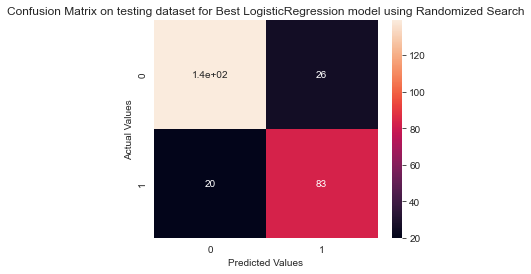



Model:  LogisticRegression(Randomized Search)

Training Set accuracy:  0.8057784911717496
Test Set accuracy:  0.8283582089552238
Test Set precision:  0.8308823719381283
Test Set recall:  0.8283582089552238
Test Set f1_score:  0.8291978263817182
ROC-AUC Score (Avg) for Test set : 0.8241247425713445


Count of Classes: 2
Test Set ROC_AUC_Score(Avg):  0.8241247425713445


{0: 0.8241247425713445, 1: 0.8241247425713446}
Best: 0.782335 using {'weights': 'distance', 'n_neighbors': 9, 'metric': 'manhattan'}


The best Hyperparameters as per RandomizedSearchCV for KNearestNeighbours model are :
{'weights': 'distance', 'n_neighbors': 9, 'metric': 'manhattan'}



Classification Report on training dataset for Best KNearestNeighbours model using Randomized Search
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       384
           1       0.99      0.97      0.98       239

    accuracy                           0.98       623
   macro avg       

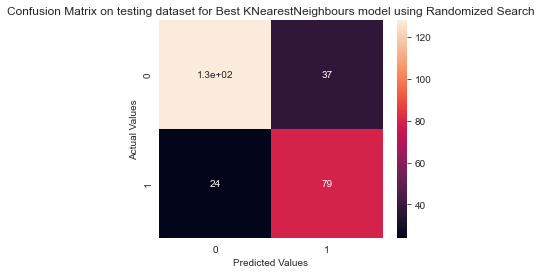



Model:  KNearestNeighbours(Randomized Search)

Training Set accuracy:  0.9839486356340289
Test Set accuracy:  0.7723880597014925
Test Set precision:  0.7802011945716066
Test Set recall:  0.7723880597014925
Test Set f1_score:  0.7744765434312384
ROC-AUC Score (Avg) for Test set : 0.771373933509856


Count of Classes: 2
Test Set ROC_AUC_Score(Avg):  0.771373933509856


{0: 0.771373933509856, 1: 0.771373933509856}
Best: 0.691790 using {'var_smoothing': 0.657933224657568}


The best Hyperparameters as per RandomizedSearchCV for GaussianNB model are :
{'var_smoothing': 0.657933224657568}



Classification Report on training dataset for Best GaussianNB model using Randomized Search
              precision    recall  f1-score   support

           0       0.88      0.66      0.75       384
           1       0.61      0.86      0.71       239

    accuracy                           0.74       623
   macro avg       0.75      0.76      0.73       623
weighted avg       0.78      0.74      0.

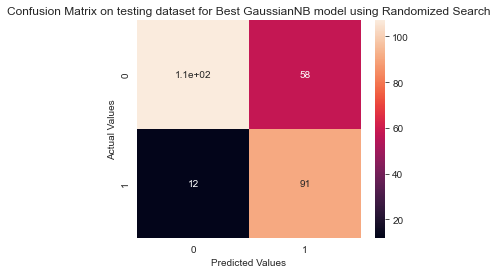



Model:  GaussianNB(Randomized Search)

Training Set accuracy:  0.7351524879614767
Test Set accuracy:  0.7388059701492538
Test Set precision:  0.7883111373368341
Test Set recall:  0.7388059701492538
Test Set f1_score:  0.7414920701656039
ROC-AUC Score (Avg) for Test set : 0.7659899970579582


Count of Classes: 2
Test Set ROC_AUC_Score(Avg):  0.7659899970579582


{0: 0.7659899970579582, 1: 0.7659899970579582}
Best: 0.780090 using {'max_depth': 10}


The best Hyperparameters as per RandomizedSearchCV for DecisionTrees model are :
{'max_depth': 10}



Classification Report on training dataset for Best DecisionTrees model using Randomized Search
              precision    recall  f1-score   support

           0       0.93      0.97      0.95       384
           1       0.94      0.89      0.91       239

    accuracy                           0.94       623
   macro avg       0.94      0.93      0.93       623
weighted avg       0.94      0.94      0.94       623


Classification Report

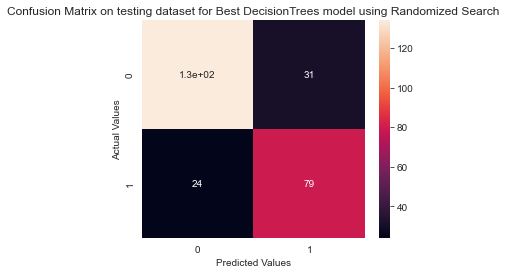



Model:  DecisionTrees(Randomized Search)

Training Set accuracy:  0.9357945425361156
Test Set accuracy:  0.7947761194029851
Test Set precision:  0.7981695378115178
Test Set recall:  0.7947761194029851
Test Set f1_score:  0.795924554613233
ROC-AUC Score (Avg) for Test set : 0.789555751691674


Count of Classes: 2
Test Set ROC_AUC_Score(Avg):  0.789555751691674


{0: 0.7895557516916739, 1: 0.789555751691674}
Best: 0.807826 using {'min_samples_split': 4, 'min_samples_leaf': 1, 'max_depth': 10, 'criterion': 'gini'}


The best Hyperparameters as per RandomizedSearchCV for RandomForest model are :
{'min_samples_split': 4, 'min_samples_leaf': 1, 'max_depth': 10, 'criterion': 'gini'}



Classification Report on training dataset for Best RandomForest model using Randomized Search
              precision    recall  f1-score   support

           0       0.90      0.97      0.93       384
           1       0.95      0.82      0.88       239

    accuracy                           0.91       62

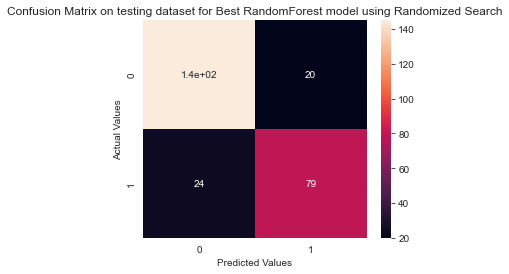



Model:  RandomForest(Randomized Search)

Training Set accuracy:  0.9149277688603531
Test Set accuracy:  0.835820895522388
Test Set precision:  0.8349252482432735
Test Set recall:  0.835820895522388
Test Set f1_score:  0.8351784682445365
ROC-AUC Score (Avg) for Test set : 0.8228890850250073


Count of Classes: 2
Test Set ROC_AUC_Score(Avg):  0.8228890850250073


{0: 0.8228890850250073, 1: 0.8228890850250073}
Best: 0.785458 using {'n_estimators': 80, 'learning_rate': 0.5}


The best Hyperparameters as per RandomizedSearchCV for AdaBoost model are :
{'n_estimators': 80, 'learning_rate': 0.5}



Classification Report on training dataset for Best AdaBoost model using Randomized Search
              precision    recall  f1-score   support

           0       0.84      0.88      0.86       384
           1       0.79      0.74      0.76       239

    accuracy                           0.83       623
   macro avg       0.82      0.81      0.81       623
weighted avg       0.82      0.83    

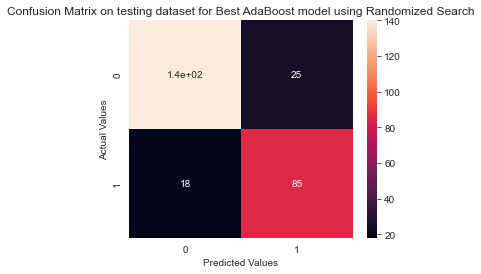



Model:  AdaBoost(Randomized Search)

Training Set accuracy:  0.8250401284109149
Test Set accuracy:  0.8395522388059702
Test Set precision:  0.8425128385689504
Test Set recall:  0.8395522388059702
Test Set f1_score:  0.8404501063339822
ROC-AUC Score (Avg) for Test set : 0.8368637834657252


Count of Classes: 2
Test Set ROC_AUC_Score(Avg):  0.8368637834657252


{0: 0.8368637834657252, 1: 0.8368637834657252}
Best: 0.796646 using {'n_estimators': 1000}


The best Hyperparameters as per RandomizedSearchCV for Bagging Classifier model are :
{'n_estimators': 1000}



Classification Report on training dataset for Best Bagging Classifier model using Randomized Search
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       384
           1       0.99      0.97      0.98       239

    accuracy                           0.98       623
   macro avg       0.99      0.98      0.98       623
weighted avg       0.98      0.98      0.98       623


Cla

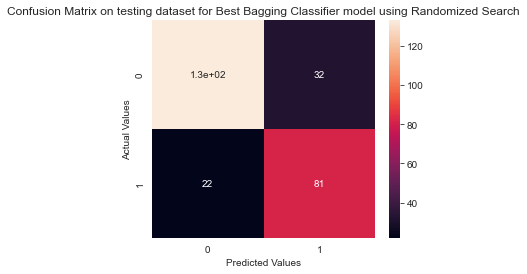



Model:  Bagging Classifier(Randomized Search)

Training Set accuracy:  0.9839486356340289
Test Set accuracy:  0.7985074626865671
Test Set precision:  0.8037779983894402
Test Set recall:  0.7985074626865671
Test Set f1_score:  0.8000233208955224
ROC-AUC Score (Avg) for Test set : 0.7962341865254486


Count of Classes: 2
Test Set ROC_AUC_Score(Avg):  0.7962341865254486


{0: 0.7962341865254486, 1: 0.7962341865254486}
Best: 0.806784 using {'n_estimators': 100, 'max_depth': 5, 'learning_rate': 0.1}


The best Hyperparameters as per RandomizedSearchCV for GradientBoosting model are :
{'n_estimators': 100, 'max_depth': 5, 'learning_rate': 0.1}



Classification Report on training dataset for Best GradientBoosting model using Randomized Search
              precision    recall  f1-score   support

           0       0.94      0.99      0.97       384
           1       0.98      0.90      0.94       239

    accuracy                           0.96       623
   macro avg       0.96      0.95

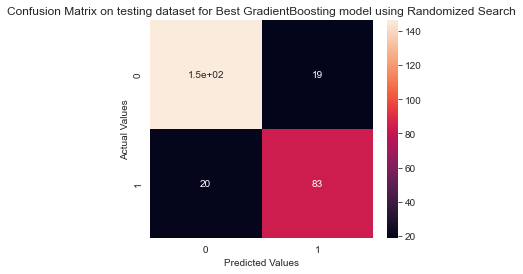



Model:  GradientBoosting(Randomized Search)

Training Set accuracy:  0.956661316211878
Test Set accuracy:  0.8544776119402985
Test Set precision:  0.854232117230996
Test Set recall:  0.8544776119402985
Test Set f1_score:  0.8543425016249531
ROC-AUC Score (Avg) for Test set : 0.8453368637834657


Count of Classes: 2
Test Set ROC_AUC_Score(Avg):  0.8453368637834657


{0: 0.8453368637834656, 1: 0.8453368637834657}
Best: 0.794001 using {'kernel': 'poly', 'gamma': 'scale', 'C': 1.0}


The best Hyperparameters as per RandomizedSearchCV for SVC model are :
{'kernel': 'poly', 'gamma': 'scale', 'C': 1.0}



Classification Report on training dataset for Best SVC model using Randomized Search
              precision    recall  f1-score   support

           0       0.81      0.96      0.88       384
           1       0.92      0.64      0.75       239

    accuracy                           0.84       623
   macro avg       0.86      0.80      0.82       623
weighted avg       0.85      0.84  

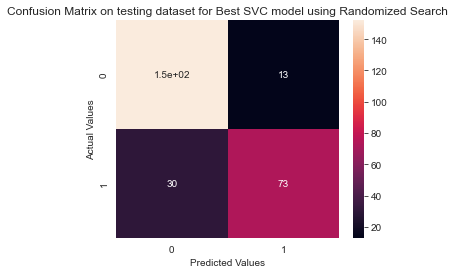



Model:  SVC(Randomized Search)

Training Set accuracy:  0.8378812199036918
Test Set accuracy:  0.8395522388059702
Test Set precision:  0.8404195162699154
Test Set recall:  0.8395522388059702
Test Set f1_score:  0.8362666107730412
ROC-AUC Score (Avg) for Test set : 0.8149749926448956


Count of Classes: 2
Test Set ROC_AUC_Score(Avg):  0.8149749926448956


{0: 0.8149749926448956, 1: 0.8149749926448956}


In [129]:
#Hypertuning (Randomized Search) Different Models + Fit/Predict 
j = 0
for modelname, model in class_models:
    # mdl=OneVsRestClassifier(model)
    mdl=model
    rs = RandomizedSearchCV(mdl,
                            param_grids[j],
                            n_jobs=-1, 
                            cv=cv,
                            scoring='accuracy',
                            refit=True) 
    #rand_search = RandomizedSearchCV(model, grid, n_iter=500, n_jobs=-1, cv=cv, scoring=scoring, error_score=0)
    rs_mdl=rs.fit(X_train_scaled,y_train)
    # summarize results
    print("Best: %f using %s" % (rs_mdl.best_score_, rs_mdl.best_params_))
    print('\n')
    print(f"The best Hyperparameters as per RandomizedSearchCV for {modelname} model are :")
    print(rs_mdl.best_params_)
    print('\n')
    
    predict_train_rs = rs_mdl.predict(X_train_scaled)
    
    predict_test_rs = rs_mdl.predict(X_test_scaled)
    
    print(f"\nClassification Report on training dataset for Best {modelname} model using Randomized Search")
    print(classification_report(y_train, predict_train_rs))
    
    print(f"\nClassification Report on Test dataset for Best {modelname} model using Randomized Search")
    print(classification_report(y_test, predict_test_rs))
    
    cm = metrics.confusion_matrix(y_test, predict_test_rs)
    cm_df = pd.DataFrame(cm)
    #Plotting the confusion matrix
    plt.figure(figsize=(5,4))
    sns.heatmap(cm_df, annot=True)
    plt.title(f'Confusion Matrix on testing dataset for Best {modelname} model using Randomized Search')
    plt.ylabel('Actual Values')
    plt.xlabel('Predicted Values')
    plt.show()
 
    name=modelname+'(Randomized Search)'
    i += 1
    print_scores(name, rs_mdl, y_train, predict_train_rs, y_test, predict_test_rs)
    j += 1

In [130]:
model_results

Algorithm  \
1          LogisticRegression(Base Model)   
2          KNearestNeighbours(Base Model)   
3                  GaussianNB(Base Model)   
4               DecisionTrees(Base Model)   
5                RandomForest(Base Model)   
6                    AdaBoost(Base Model)   
7          Bagging Classifier(Base Model)   
8            GradientBoosting(Base Model)   
9                         SVC(Base Model)   
10  LogisticRegression(Randomized Search)   
11  KNearestNeighbours(Randomized Search)   
12          GaussianNB(Randomized Search)   
13       DecisionTrees(Randomized Search)   
14        RandomForest(Randomized Search)   
15            AdaBoost(Randomized Search)   
16  Bagging Classifier(Randomized Search)   
17    GradientBoosting(Randomized Search)   
18                 SVC(Randomized Search)   

                                                Model  Accuracy_Train  \
1                                LogisticRegression()           80.26   
2                 KNeighborsClassifier(n_neighbors=3)           87.32   
3                                        GaussianNB()           41.89   
4                            DecisionTreeClassifier()           98.39   
5   (DecisionTreeClassifier(max_features='auto', r...           98.39   
6   (DecisionTreeClassifier(max_depth=1, random_st...           81.22   
7   (DecisionTreeClassifier(random_state=149976301...           96.63   
8   ([DecisionTreeRegressor(criterion='friedman_ms...           90.05   
9                               SVC(probability=True)           82.34   
10  RandomizedSearchCV(cv=RepeatedStratifiedKFold(...           80.58   
11  RandomizedSearchCV(cv=RepeatedStratifiedKFold(...           98.39   
12  RandomizedSearchCV(cv=RepeatedStratifiedKFold(...           73.52   
13  RandomizedSearchCV(cv=RepeatedStratifiedKFold(...           93.58   
14  RandomizedSearchCV(cv=RepeatedStratifiedKFold(...           91.49   
15  RandomizedSearchCV(cv=RepeatedStratifiedKFold(...           82.50   
16  RandomizedSearchCV(cv=RepeatedStratifiedKFold(...           98.39   
17  RandomizedSearchCV(cv=RepeatedStratifiedKFold(...           95.67   
18  RandomizedSearchCV(cv=RepeatedStratifiedKFold(...           83.79   

    Accuracy_Test  Precision_Test  True_Positive Rate (Recall)  F1_Score_Test  \
1           82.46           82.89                        82.46          82.58   
2           76.12           77.74                        76.12          76.42   
3           42.16           68.05                        42.16          30.00   
4           77.99           78.47                        77.99          78.14   
5           81.72           82.16                        81.72          81.84   
6           82.84           83.09                        82.84          82.92   
7           82.09           82.46                        82.09          82.20   
8           84.70           84.60                        84.70          84.59   
9           85.45           85.38                        85.45          85.31   
10          82.84           83.09                        82.84          82.92   
11          77.24           78.02                        77.24          77.45   
12          73.88           78.83                        73.88          74.15   
13          79.48           79.82                        79.48          79.59   
14          83.58           83.49                        83.58          83.52   
15          83.96           84.25                        83.96          84.05   
16          79.85           80.38                        79.85          80.00   
17          85.45           85.42                        85.45          85.43   
18          83.96           84.04                        83.96          83.63   

    ROC_AUC_SCORE(Avg)  
1                82.29  
2                76.78  
3                52.67  
4                77.56  
5                81.50  
6                82.41  
7                81.81  
8                83.20  
9                83.80 

Classification Report using base SVC for Training dataset
              precision    recall  f1-score   support

           0       0.82      0.91      0.86       384
           1       0.83      0.68      0.75       239

    accuracy                           0.82       623
   macro avg       0.83      0.80      0.81       623
weighted avg       0.82      0.82      0.82       623

Classification Report using base SVC for Test dataset
              precision    recall  f1-score   support

           0       0.86      0.91      0.88       165
           1       0.84      0.77      0.80       103

    accuracy                           0.85       268
   macro avg       0.85      0.84      0.84       268
weighted avg       0.85      0.85      0.85       268



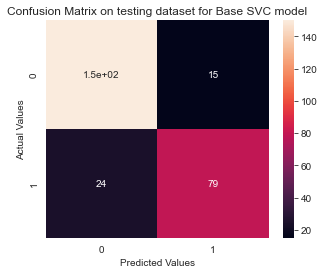

In [131]:
model = SVC(kernel = 'rbf',probability=True)
mdl=model.fit(X_train_scaled,y_train)
pred_train=mdl.predict(X_train_scaled)
pred_test=mdl.predict(X_test_scaled)
print(f"Classification Report using base {modelname} for Training dataset")
print(classification_report(y_train, pred_train))
print(f"Classification Report using base {modelname} for Test dataset")
print(classification_report(y_test, pred_test))
    
cm = metrics.confusion_matrix(y_test, pred_test)
cm_df = pd.DataFrame(cm)
#Plotting the confusion matrix
plt.figure(figsize=(5,4))
sns.heatmap(cm_df, annot=True)
plt.title(f'Confusion Matrix on testing dataset for Base {modelname} model')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

In [132]:
from sklearn.model_selection import cross_val_score
cv=cross_val_score(mdl, X_rescaled, y, cv=10)
print(cv, cv.min(), cv.max(), cv.mean())

[0.81111111 0.80898876 0.75280899 0.83146067 0.82022472 0.78651685
 0.80898876 0.76404494 0.85393258 0.83146067] 0.7528089887640449 0.8539325842696629 0.8069538077403247


In [134]:
model=SVC(probability=True)
grid_search = GridSearchCV(estimator=model,
                            param_grid={'kernel': ['poly', 'rbf', 'sigmoid'], 
                            'C': [10, 1.0, 0.1, 0.01],
                            'gamma': ['scale']},
                            n_jobs=-1, 
                            cv=10,
                            scoring='accuracy',
                            refit=True) 

In [135]:
mdl=grid_search.fit(X_train_scaled,y_train)

In [136]:
mdl.best_params_

{'C': 1.0, 'gamma': 'scale', 'kernel': 'poly'}

In [137]:
train_predict=mdl.predict(X_train_scaled)
test_predict=mdl.predict(X_test_scaled)

In [138]:
print(classification_report(y_train, train_predict))

              precision    recall  f1-score   support

           0       0.81      0.96      0.88       384
           1       0.92      0.64      0.75       239

    accuracy                           0.84       623
   macro avg       0.86      0.80      0.82       623
weighted avg       0.85      0.84      0.83       623



In [139]:
print(classification_report(y_test, test_predict))

              precision    recall  f1-score   support

           0       0.84      0.92      0.88       165
           1       0.85      0.71      0.77       103

    accuracy                           0.84       268
   macro avg       0.84      0.81      0.82       268
weighted avg       0.84      0.84      0.84       268



The confusion matrix is as follows


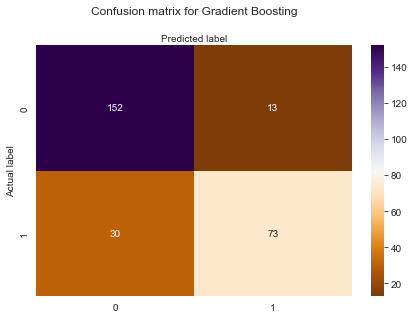

In [140]:
print("The confusion matrix is as follows")
class_names=["No","Yes"] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(metrics.confusion_matrix(y_test, test_predict)), annot=True, cmap="PuOr" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix for Gradient Boosting', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

In [164]:
test_data = pd.read_csv("./Data/test.csv")

In [165]:
test_data.Embarked.fillna('S',inplace=True)

In [166]:
test_data.Age.fillna(titanic_data.Age.median(), inplace=True)
test_data.Age=np.where(test_data.Age==0,titanic_data.Age.median(),test_data.Age)
test_data.Fare.fillna(titanic_data.Fare.median(), inplace=True)

In [167]:
test_data.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [168]:
test_data=pd.concat([test_data,pd.get_dummies(test_data['Parch']).rename(columns={0:'parch_0',1:'parch_1',2:'parch_2',3:'parch_3',4:'parch_4',5:'parch_5',6:'parch_6'})],axis=1)

In [169]:
test_data=pd.concat([test_data,pd.get_dummies(test_data['Embarked']).rename(columns={'C':'emb_c','S':'em_s','Q':'em_q'})],axis=1)

In [170]:
test_data=pd.concat([test_data,pd.get_dummies(test_data['Sex'])],axis=1)

In [171]:
test_data=pd.concat([test_data,pd.get_dummies(test_data['Pclass']).rename(columns={1:'class1',2:'class2',3:'class3'})],axis=1)

In [172]:
test_data=pd.concat([test_data,pd.get_dummies(test_data['SibSp']).rename(columns={0:'sib_0',1:'sib_1',2:'sib_2',3:'sib_3',4:'sib_4',5:'sib_5',8:'sib_8'})],axis=1)

In [173]:
test_data.columns

Index(['PassengerId',      'Pclass',        'Name',         'Sex',
               'Age',       'SibSp',       'Parch',      'Ticket',
              'Fare',       'Cabin',    'Embarked',     'parch_0',
           'parch_1',     'parch_2',     'parch_3',     'parch_4',
           'parch_5',     'parch_6',             9,       'emb_c',
              'em_q',        'em_s',      'female',        'male',
            'class1',      'class2',      'class3',       'sib_0',
             'sib_1',       'sib_2',       'sib_3',       'sib_4',
             'sib_5',       'sib_8'],
      dtype='object')

In [174]:
X.columns

Index(['Age', 'Fare', 'parch_0', 'parch_1', 'parch_2', 'parch_3', 'parch_4',
       'parch_5', 'parch_6', 'emb_c', 'em_q', 'em_s', 'female', 'male',
       'class1', 'class2', 'class3', 'sib_0', 'sib_1', 'sib_2', 'sib_3',
       'sib_4', 'sib_5', 'sib_8'],
      dtype='object')

In [175]:
test_data2=test_data[['Age', 'Fare', 'parch_0', 'parch_1', 'parch_2', 'parch_3', 'parch_4',
       'parch_5', 'parch_6', 'emb_c', 'em_q', 'em_s', 'female', 'male',
       'class1', 'class2', 'class3', 'sib_0', 'sib_1', 'sib_2', 'sib_3',
       'sib_4', 'sib_5', 'sib_8']]

In [176]:
X_test_std = scaler.transform(test_data2)
X_test_scaled=pd.DataFrame(X_test_std)

In [177]:
test_predict=mdl.predict(X_test_scaled)

In [178]:
test_predict

array([0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [187]:
submission_data=pd.concat([test_data['PassengerId'],pd.DataFrame(test_predict)],axis=1)

In [188]:
submission_data.shape

(418, 2)

In [192]:
submission_data=submission_data.rename(columns={0:'Survived'})

In [193]:
submission_data.to_csv('./Data/submission.csv', index=False)